<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Notebook

#### 1. [Load Data](#part1)  

#### 2. [Data Wrangling on multiple tables](#part2)  

#### 3. [Train Test Split](#part3)  

#### 4. [Missing Value Imputation and Data Preprocessing](#part4)  

#### 5. [Numerical Data Transformation](#part5)

#### 6. [Variable Discretization /Binning](#part6)

#### 7. [Feature Engineer](#part7)

#### 8. [Machine Learning Model](#part8)

## Report

#### 1. [Value based problem statement](#part9)  

#### 2. [Problem Formulation](#part10)  

#### 3. [Data Wrangling on multiple tables](#part11)  

#### 4. [Data Cleansing and Transformation](#part12)  

#### 5. [Machine Learning Model](#part13)

#### 6. [Summary and Further Improvements](#part14)

## Notebook

In [1]:
# import the packages
import pandas as pd
import numpy as np
import datetime

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# the scaler 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Data<a id="part1"></a>

In [2]:
# load all the dataset and show the info
df1 = pd.read_csv('circuits_mod.csv')
df2 = pd.read_csv('constructor_results_mod.csv')
df3 = pd.read_csv('constructor_standings_mod.csv')
df4 = pd.read_csv('constructors_mod.csv')
df5 = pd.read_csv('driver_standings_mod.csv')
df6 = pd.read_csv('drivers_mod.csv')
df7 = pd.read_csv('lap_times_mod.csv')
df8 = pd.read_csv('pit_stops_mod.csv')
df9 = pd.read_csv('qualifying_mod.csv')
df10 = pd.read_csv('races_mod.csv')
df11 = pd.read_csv('results_mod.csv')
df12 = pd.read_csv('seasons_mod.csv')
df13 = pd.read_csv('status_mod.csv')

display(df1.head(), df2.head(), df3.head(), df4.head(), df5.head(), df6.head(), df7.head(), df8.head(), df9.head(), df10.head(), df11.head(), df12.head(), df13.head())

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


### Step 2: Data Wrangling on multiple tables<a id="part2"></a>

In [3]:
# joining driver's forename and surname 
df6["drivername"] = df6["forename"] + " " + df6["surname"]

In [4]:
# merging of data
df = df11[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points']]
df = df.rename(columns={'positionOrder': 'resultposition', 'points': 'pointsfromrace'})

df = pd.merge(df,df10[['raceId', 'round', 'name', 'date']],on='raceId',how='left').drop_duplicates()
df = df.rename(columns={'name': 'racename'})

df = pd.merge(df,df3[['raceId','constructorId', 'points', 'wins']],on=['raceId', 'constructorId'],how='left').drop_duplicates()
df = df.rename(columns={'points': 'constructorpoints','wins': 'constructorwins'})

df = pd.merge(df,df4[['constructorId', 'name']],on='constructorId',how='left').drop_duplicates()
df = df.rename(columns={'name': 'constructorname'})

df = pd.merge(df,df5[['raceId', 'driverId', 'points', 'wins']],on=['raceId', 'driverId'],how='left').drop_duplicates()
df = df.rename(columns={'points': 'driverpoints', 'wins': 'driverwins'})

df = pd.merge(df,df6[['driverId', 'drivername', 'dob']],on='driverId',how='left').drop_duplicates()

df = pd.merge(df,df9[['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3']], on=['raceId', 'driverId', 'constructorId'],how='left').drop_duplicates()

df

,raceId,driverId,constructorId,grid,resultposition,pointsfromrace,round,racename,date,constructorpoints,constructorwins,constructorname,driverpoints,driverwins,drivername,dob,q1,q2,q3
0,18,1,1,1,1,10.0,1,Australian Grand Prix,3/16/2008,14.0,1.0,McLaren,10,1.0,Lewis Hamilton,1985-01-07,1:26.572,1:25.187,1:26.714
1,18,2,2,5,2,8.0,1,Australian Grand Prix,3/16/2008,8.0,0.0,BMW Sauber,8,0.0,Nick Heidfeld,1977-05-10,1:25.960,1:25.518,1:27.236
2,18,3,3,7,3,6.0,1,Australian Grand Prix,3/16/2008,9.0,0.0,Williams,6,0.0,Nico Rosberg,1985-06-27,1:26.295,1:26.059,1:28.687
3,18,4,4,11,4,5.0,1,Australian Grand Prix,3/16/2008,5.0,0.0,Renault,5,0.0,Fernando Alonso,1981-07-29,1:26.907,1:26.188,\N
4,18,5,1,3,5,4.0,1,Australian Grand Prix,3/16/2008,14.0,1.0,McLaren,4,0.0,Heikki Kovalainen,1981-10-19,1:25.664,1:25.452,1:27.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,1073,815,9,4,15,0.0,22,Abu Dhabi Grand Prix,12/12/2021,585.5,11.0,Red Bull,190,1.0,Sergio Pérez,1990-01-26,1:23.350,1:23.135,1:22.947
25395,1073,849,3,16,16,0.0,22,Abu Dhabi Grand Prix,12/12/2021,23.0,0.0,Williams,7,0.0,Nicholas Latifi,1995-06-29,1:24.338,\N,\N
25396,1073,841,51,14,17,0.0,22,Abu Dhabi Grand Prix,12/12/2021,13.0,0.0,Alfa Romeo,3,0.0,Antonio Giovinazzi,1993-12-14,1:24.118,1:24.251,\N
25397,1073,847,3,17,18,0.0,22,Abu Dhabi Grand Prix,12/12/2021,23.0,0.0,Williams,16,0.0,George Russell,1998-02-15,1:24.423,\N,\N


In [5]:
df.isnull().sum()

raceId                   0
driverId                 0
constructorId            0
grid                     0
resultposition           0
pointsfromrace           0
round                    0
racename                 0
date                   206
constructorpoints     1875
constructorwins       1875
constructorname          0
driverpoints           486
driverwins             481
drivername               0
dob                      0
q1                   16283
q2                   16409
q3                   16530
dtype: int64

In [6]:
# replace null values by np.nan
df['q1'] = df['q1'].replace('\\N', np.nan)
df['q2'] = df['q2'].replace('\\N', np.nan)
df['q3'] = df['q3'].replace('\\N', np.nan)
df['driverpoints'] = df['driverpoints'].replace('O', '0')
df['driverpoints'] = df['driverpoints'].replace(np.nan, '0')
df['driverpoints'] = pd.to_numeric(df['driverpoints'])

In [7]:
# replcae missing date 
df["date"] = np.where(df["raceId"] == 27, "7/20/2008", df["date"])
df["date"] = np.where(df["raceId"] == 69, "10/8/2006", df["date"])
df["date"] = np.where(df["raceId"] == 105, "9/26/2004", df["date"])
df["date"] = np.where(df["raceId"] == 900, "3/16/2014", df["date"])
df["date"] = np.where(df["raceId"] == 917, "11/9/2014", df["date"])
df["date"] = np.where(df["raceId"] == 948, "3/20/2016", df["date"])
df["date"] = np.where(df["raceId"] == 961, "9/4/2016", df["date"])
df["date"] = np.where(df["raceId"] == 991, "4/15/2018", df["date"])
df["date"] = np.where(df["raceId"] == 1028, "9/3/2019", df["date"])
df["date"] = np.where(df["raceId"] == 1062, "8/1/2021", df["date"])

In [8]:
# replacing values for df['date']
for i in df['date']:
    date = str(i)
    if '/' in date:
        dates = date.split('/')
        if int(dates[2]) > 10000:
            dates[2] = dates[2][1:]
            newdate = '/'.join(dates)
            df["date"].replace(i, newdate, inplace = True)
            continue

In [9]:
# re-casting df['date'] as datetime and create a new column year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [10]:
# convert qualifying times to milliseconds
for i in df['q1']:
    time = str(i)
    newtime=0
    if 'NaN' not in time:
        if ':' in time:
            time = time.split(':')
            newtime += int(time[0])*60*1000
            time2 = time[1].split('.')
            newtime += int(time2[0])*1000 + int(time2[1])
            df["q1"].replace(i, newtime, inplace = True)
            
for i in df['q2']:
    time = str(i)
    newtime=0
    if 'NaN' not in time:
        if ':' in time:
            time = time.split(':')
            newtime += int(time[0])*60*1000
            time2 = time[1].split('.')
            newtime += int(time2[0])*1000 + int(time2[1])
            df["q2"].replace(i, newtime, inplace = True)
            
for i in df['q3']:
    time = str(i)
    newtime=0
    if 'NaN' not in time:
        if ':' in time:
            time = time.split(':')
            newtime += int(time[0])*60*1000
            time2 = time[1].split('.')
            newtime += int(time2[0])*1000 + int(time2[1])
            df["q3"].replace(i, newtime, inplace = True)

In [11]:
# getting driver's age
df['dob'] = pd.to_datetime(df['dob'])
df['dob'] = df['dob'].dt.year
df['age'] = df['year'] - df['dob']

In [12]:
df['driverpoints'] = df['driverpoints'].astype('float')

# getting drivers' points before the race
df["currentpoint"] = df["driverpoints"] - df["pointsfromrace"]

In [13]:
# getting driver current wins
df['drivercurrentwins'] = ""

for r in range(len(df['driverwins'])):
    value = int(df.loc[r, 'round']) #gets round number
    value2 = int(df.loc[r, 'raceId']) #gets raceid
    value3 = int(df.loc[r, 'driverId']) #gets driverid
    if (value == 1):
        df.loc[r, 'drivercurrentwins'] = 0
    elif (value > 1):
        try:
            df.loc[r, 'drivercurrentwins'] = df.loc[(df['raceId'] == (value2-1)) & (df['round'] == (value-1)) & (df['driverId'] == value3)]['driverwins'].iloc[0]
        except IndexError:
            df.loc[r, 'drivercurrentwins'] = 0

In [14]:
# getting constructor current points
df['constructorcurrentpoints'] = ""

for r in range(len(df['constructorpoints'])):
    value = int(df.loc[r, 'round']) #gets round number
    value2 = int(df.loc[r, 'raceId']) #gets raceid
    value3 = int(df.loc[r, 'constructorId']) #gets constructorid
    if (value == 1):
        df.loc[r, 'constructorcurrentpoints'] = 0
    elif (value > 1):
        try:
            df.loc[r, 'constructorcurrentpoints'] = df.loc[(df['raceId'] == (value2-1)) & (df['round'] == (value-1)) & (df['constructorId'] == value3)]['constructorpoints'].iloc[0]
        except IndexError:
            df.loc[r, 'constructorcurrentpoints'] = 0

In [15]:
# getting constructor current wins
df['constructorcurrentwins'] = ""

for r in range(len(df['constructorwins'])):
    value = int(df.loc[r, 'round']) #gets round number
    value2 = int(df.loc[r, 'raceId']) #gets raceid
    value3 = int(df.loc[r, 'constructorId']) #gets constructorid
    if (value == 1):
        df.loc[r, 'constructorcurrentwins'] = 0
    elif (value > 1):
        try:
            df.loc[r, 'constructorcurrentwins'] = df.loc[(df['raceId'] == (value2-1)) & (df['round'] == (value-1)) & (df['constructorId'] == value3)]['constructorwins'].iloc[0]
        except IndexError:
            df.loc[r, 'constructorcurrentwins'] = 0

In [16]:
# re-casting as numeric
df['constructorcurrentpoints'] = pd.to_numeric(df['constructorcurrentpoints'])
df['constructorcurrentwins'] = pd.to_numeric(df['constructorcurrentwins'])
df['drivercurrentwins'] = pd.to_numeric(df['drivercurrentwins'])

In [17]:
# dropping columns that are not needed
df.drop(['date', 'constructorpoints', 'constructorwins', 'driverpoints', 'driverwins', 'pointsfromrace', 'dob'], axis = 1, inplace = True)

In [18]:
# dropping rows that are before year 2006
df = df.drop(df[df.year < 2006].index)

In [19]:
df.head()

,raceId,driverId,constructorId,grid,resultposition,round,racename,constructorname,drivername,q1,q2,q3,year,age,currentpoint,drivercurrentwins,constructorcurrentpoints,constructorcurrentwins
0,18,1,1,1,1,1,Australian Grand Prix,McLaren,Lewis Hamilton,86572.0,85187.0,86714.0,2008,23,0.0,0.0,0.0,0.0
1,18,2,2,5,2,1,Australian Grand Prix,BMW Sauber,Nick Heidfeld,85960.0,85518.0,87236.0,2008,31,0.0,0.0,0.0,0.0
2,18,3,3,7,3,1,Australian Grand Prix,Williams,Nico Rosberg,86295.0,86059.0,88687.0,2008,23,0.0,0.0,0.0,0.0
3,18,4,4,11,4,1,Australian Grand Prix,Renault,Fernando Alonso,86907.0,86188.0,NaN,2008,27,0.0,0.0,0.0,0.0
4,18,5,1,3,5,1,Australian Grand Prix,McLaren,Heikki Kovalainen,85664.0,85452.0,87079.0,2008,27,0.0,0.0,0.0,0.0


### Step 3: Train Test Split<a id="part3"></a>

In [20]:
# Separate the data into training (70%) and testing sets (30%)
# Target variable is Item_Outlet_Sales and dropping it with Item_Identifier and Outlet_Identifier
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['raceId', 'racename', 'constructorId', 'constructorname', 'driverId', 'drivername', 'resultposition'], axis=1), df['resultposition'], 
    test_size=0.3, random_state=10)

X_train.shape, X_test.shape

((4587, 11), (1967, 11))

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 21709 to 7704
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      4587 non-null   int64  
 1   round                     4587 non-null   int64  
 2   q1                        4514 non-null   float64
 3   q2                        3292 non-null   float64
 4   q3                        2040 non-null   float64
 5   year                      4587 non-null   int64  
 6   age                       4587 non-null   int64  
 7   currentpoint              4587 non-null   float64
 8   drivercurrentwins         4553 non-null   float64
 9   constructorcurrentpoints  4577 non-null   float64
 10  constructorcurrentwins    4577 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 430.0 KB


### Step 4: Missing Value Imputation and Data Preprocessing<a id="part4"></a>

array([[<AxesSubplot:title={'center':'grid'}>,
        <AxesSubplot:title={'center':'round'}>,
        <AxesSubplot:title={'center':'q1'}>],
       [<AxesSubplot:title={'center':'q2'}>,
        <AxesSubplot:title={'center':'q3'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentpoint'}>,
        <AxesSubplot:title={'center':'drivercurrentwins'}>],
       [<AxesSubplot:title={'center':'constructorcurrentpoints'}>,
        <AxesSubplot:title={'center':'constructorcurrentwins'}>,
        <AxesSubplot:>]], dtype=object)

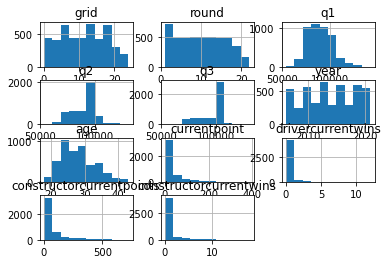

In [22]:
# replace NA with 0 and 99999 in indicated numerical variables

for var in ['q1', 'q2', 'q3']:
    
    X_train[var].fillna(99999, inplace=True)
    X_test[var].fillna(99999, inplace=True)
    
for var2 in ['constructorcurrentpoints', 'constructorcurrentwins', 'drivercurrentwins']:
    X_train[var2].fillna(0, inplace=True)
    X_test[var2].fillna(0, inplace=True)
    
X_train.hist()

### Step 5: Numerical Data Transformation<a id="part5"></a>

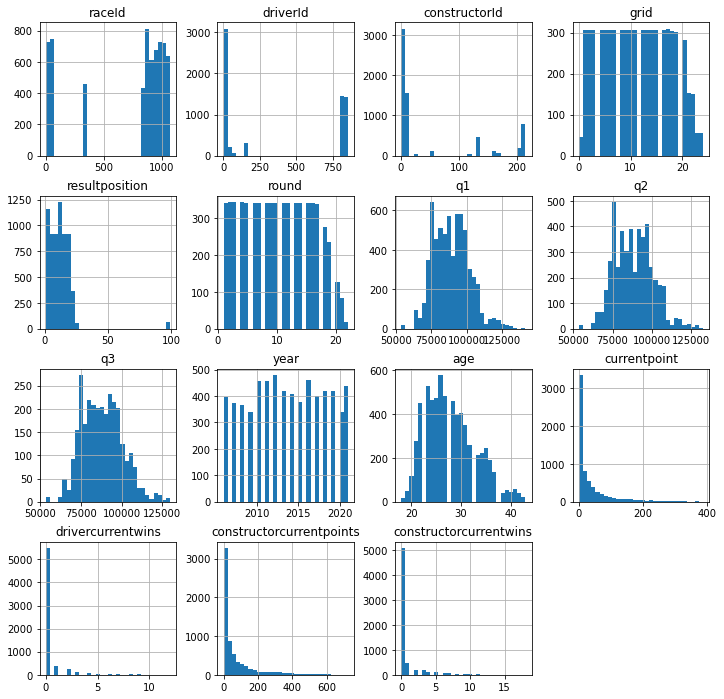

In [23]:
df.hist(bins=30, figsize=(12,12))
plt.show()

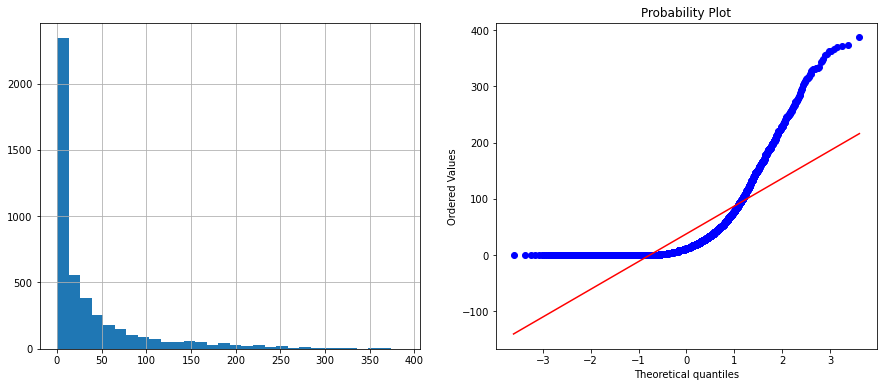

In [24]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

diagnostic_plots(X_train, 'currentpoint')

In [25]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['currentpoint', 'constructorcurrentpoints'])

# fit transformer to the dataframe
yjt.fit(X_train)

# transform indicated variables
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

In [26]:
# log(x+1)
transformer = FunctionTransformer(lambda x: np.log(x+1), validate=True) #<log (x+1) transformation>
cols = ['q1', 'q2', 'q3']
X_train_tf = transformer.transform(X_train[cols])
X_train_tf = pd.DataFrame(X_train_tf, columns=cols)
X_train.reset_index(inplace=True)
X_train['q1'] = X_train_tf['q1']
X_train['q2'] = X_train_tf['q2']
X_train['q3'] = X_train_tf['q3']
X_train.set_index('index')

X_test_tf = transformer.transform(X_test[cols])
X_test_tf = pd.DataFrame(X_test_tf, columns=cols)
X_test.reset_index(inplace=True)
X_test['q1'] = X_test_tf['q1']
X_test['q2'] = X_test_tf['q2']
X_test['q3'] = X_test_tf['q3']
X_test.set_index('index')

,grid,round,q1,q2,q3,year,age,currentpoint,drivercurrentwins,constructorcurrentpoints,constructorcurrentwins
index,,,,,,,,,,,
23845,16,4,11.556847,11.512925,11.512925,2018,26,1.933323,0.0,3.704384,0.0
22029,16,15,11.438256,11.434813,11.512925,2013,24,2.915683,0.0,3.823496,0.0
20496,5,8,11.252690,11.240749,11.233860,2010,30,2.378800,0.0,3.860864,0.0
452,3,4,11.312069,11.299014,11.311103,2007,28,3.102899,1.0,4.095934,2.0
24795,20,9,11.256083,11.512925,11.512925,2020,28,0.691546,0.0,0.706725,0.0
...,...,...,...,...,...,...,...,...,...,...,...
23449,17,4,11.485893,11.512925,11.512925,2017,23,-0.000000,0.0,0.000000,0.0
20888,20,5,11.377289,11.512925,11.512925,2011,29,-0.000000,0.0,0.000000,0.0
22779,8,13,11.575750,11.567755,11.569296,2015,18,3.259835,0.0,3.966876,0.0


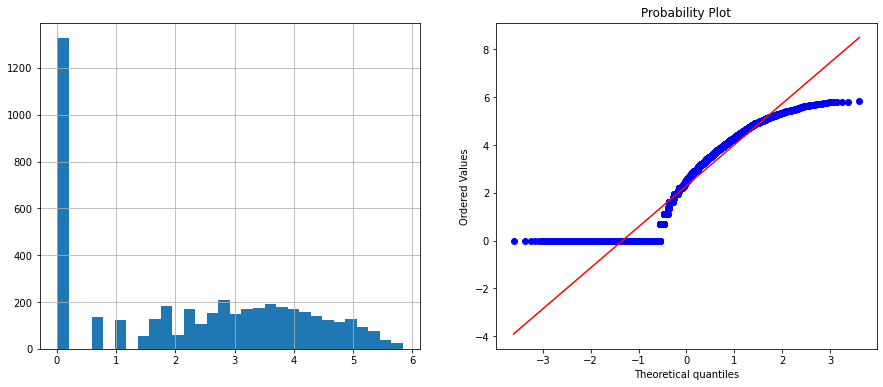

In [27]:
# use diagnostic plot function to evaluate transformation
# (not in book)
diagnostic_plots(X_train, 'currentpoint')

### Step 6: Variable Discretization /Binning<a id="part6"></a>

In [28]:
# let's set up an equal-width discretizer into 10 intervals
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# let's fit the discretizer so it learns the interval limits
disc.fit(X_train[['q1', 'q2', 'q3']])

# let's transform the train set, remember that Sklearn returns Numpy arrays
train_b = disc.transform(X_train[['q1', 'q2', 'q3']])

# transform array to dataframe
train_b = pd.DataFrame(train_b, columns = ['q1', 'q2', 'q3'])

test_b = disc.transform(X_test[['q1', 'q2', 'q3']])

test_b = pd.DataFrame(test_b, columns = ['q1', 'q2', 'q3'])

Text(0, 0.5, 'Number of observations per bin')

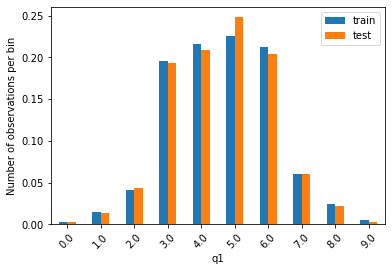

In [29]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# q1

t1 = train_b.groupby(['q1'])['q1'].count() / len(train_b)
t2 = test_b.groupby(['q1'])['q1'].count() / len(test_b)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

### Step 7: Feature Engineer<a id="part7"></a>

In [30]:
# standardisation: with the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# set up the scaler
sscaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
sscaler.fit(X_train)

# transform train and test sets
X_train_sscaled = sscaler.transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

X_train_sscaled = pd.DataFrame(X_train_sscaled, columns=X_train.columns)
X_test_sscaled = pd.DataFrame(X_test_sscaled, columns=X_test.columns)

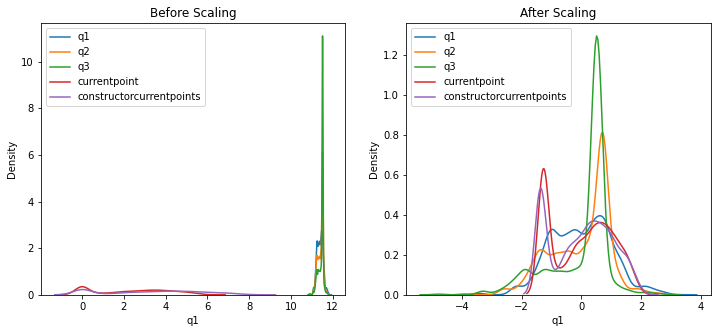

In [31]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['q1'], ax=ax1, label ='q1')
sns.kdeplot(X_train['q2'], ax=ax1, label ='q2')
sns.kdeplot(X_train['q3'], ax=ax1, label ='q3')
sns.kdeplot(X_train['currentpoint'], ax=ax1, label ='currentpoint')
sns.kdeplot(X_train['constructorcurrentpoints'], ax=ax1, label ='constructorcurrentpoints')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_sscaled['q1'], ax=ax2, label ='q1')
sns.kdeplot(X_train_sscaled['q2'], ax=ax2, label ='q2')
sns.kdeplot(X_train_sscaled['q3'], ax=ax2, label ='q3')
sns.kdeplot(X_train_sscaled['currentpoint'], ax=ax2, label ='currentpoint')
sns.kdeplot(X_train_sscaled['constructorcurrentpoints'], ax=ax2, label ='constructorcurrentpoints')
ax2.legend()
plt.show()

Text(0, 0.5, 'Percentage of Variance Explained')

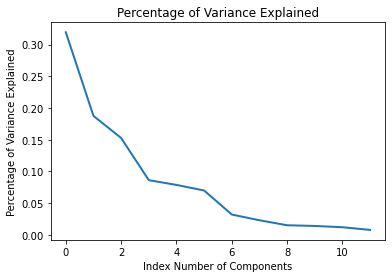

In [32]:
pca = PCA()

pca.fit(X_train_sscaled)

# create the principal components

train_t = pca.transform(X_train_sscaled)
test_t = pca.transform(X_test_sscaled)

# determine the number of informative components

# the number of components is determined by the change
# in the decay in the percentage of variance explained
# by each component

plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

### Step 8: Machine Learning Model<a id="part8"></a>

In [33]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

ModeResult(mode=array([5], dtype=int64), count=array([245]))


In [34]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[5, 5, 5, 5, 5]

In [35]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[5, 5, 5, 5, 5]

In [36]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 5.34%.
The Naive Baseline Model's accuracy on test data is 3.15%.


In [37]:
from sklearn.linear_model import LogisticRegression
logreg_ss = LogisticRegression(solver='liblinear') 
logreg_ss.fit(X_train_sscaled, y_train)

LogisticRegression(solver='liblinear')

In [38]:
y_train_preds_logreg_ss = logreg_ss.predict(X_train_sscaled)

# insert code here
y_test_preds_logreg_ss = logreg_ss.predict(X_test_sscaled)

In [39]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg_ss

train_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on train data is {train_accuracy_logreg_ss:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg_ss

test_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on test data is {test_accuracy_logreg_ss:.2f}%.")

The LogRegSS Model's accuracy on train data is 14.52%.
The LogRegSS Model's accuracy on test data is 10.42%.


## Report

### 1. Introduction with Value Based Problem Statement<a id="part9"></a>

Formula 1 (F1) is the highest class of international racing for open-wheel-single-seater formula racing cars. F1 is not like any other sport as it combines diverse sporting elements into something unique and remarkable. It is not only an individual sport, but also one about the team. Furthermore, F1 has its fair share of drama and competition between teammates as well as competitors. Then, there is also the excitement of the actual race, dangerous for the driver, but a spectacle for the audience. All these elements make F1 an interesting sport and thus having a large popularity. 

For this assignment 2, we were given datasets of Formula 1 races from Ergast.com. This is the first time that we are dealing with a sports dataset. For the dataset, we have information such as the time taken in each lap, the time taken for pit stops, the performance in the qualifying rounds etc. of all F1 races from the 1950 season till today. For this assignment, we were tasked to wrangle and prepare the data to solve a prediction problem. To formulate a prediction problem, there must be a purpose and value behind it. For example, predicting the fastest lap time for the race or predicting the driver’s position for the race. By knowing which driver or constructor is doing well, the teams could then figure out what they can do to improve. Other companies could then also have more insight which teams they want to invest in. However, before formulating a prediction problem, we would have to explore the data and see what data we have and what we can predict with it. 


### 2. Problem Formulation<a id="part10"></a>

Before we can do any analysis or prediction of the data, we need to first understand the data set by exploring it. Data exploration allows us to have a deeper understanding of the dataset, learning about the characteristics and potential problem of it. Therefore, we will be exploring the datasets using visuals to investigate the relationship between the different features/variables. To do so, I be using a heatmap.

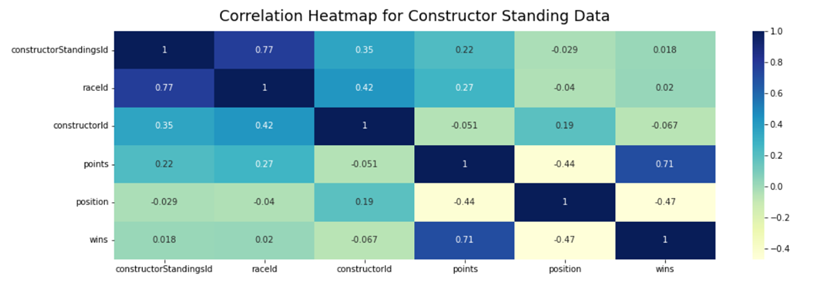

After loading in all 13 .csv files / tables, I explore the Constructor Standing Data. I used a heatmap to show the correlation between the variables. For heatmap, we are only able to show numerical variables. Heatmap is a plot of rectangular data as a colour-encoded matrix. It is able to show the correlation between the different variables using colours. The darker the colour, is shows a stronger positive correlation. Based on the heatmap, we can observe that there is a strong positive correlation between points and wins. This observation is expected as the more points the constructor gained from each race, it increases their chances to win. It could also be observed that there is a negative correlation between position and win. This observation also makes sense as having a lower position for the race, it increases the chance to get more points to win.

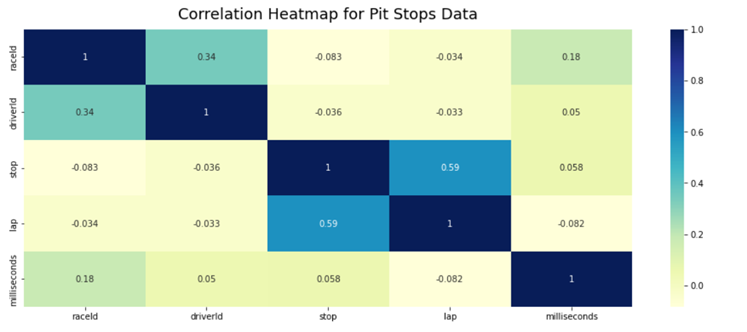

Secondly, we explored the Pit Stop Data. For the pit stop data, we found out that there is a strong positive correlation between stop and lap. As the laps increases, the tires for the F1 cars will get more and more worn out or there could be damage done to the car, leading to having more pit stops to fix what is needed. 

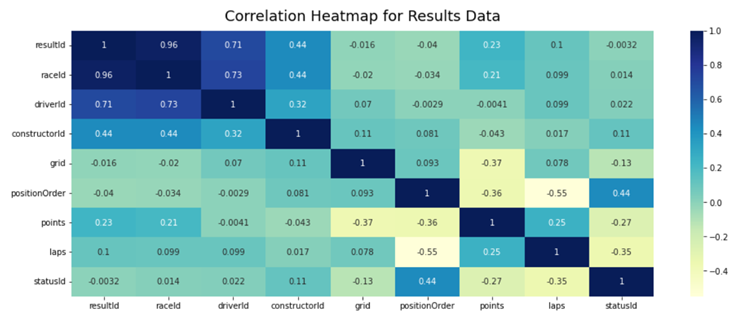

Lastly, we explored the Result Data. For the result data, we observed that there is a negative correlation between grid and points. As starting with a lower grid means starting nearer to the start line, this provides driver with a head start compared to the other drivers. With this advantage, drivers are able to hold onto their lead and face fewer challenges throughout the race, leading the finishing at a lower position, thus having higher points. Next, it can be observed that there is a slight positive correlation between position order and status id. For the correlation, it is something that I find that is surprising as based on my knowledge, it is something that I have no clue on. With the finding, I could explore more of this relationship later on to find out why. 

After data exploration, we would be understanding the data, so that we would have an easier time to know which dataset and which column we would want to use.

circuits: It contains all the different circuit that F1 ever had, providing information on its location.

constructor_standing: It shows the points, position and wins each constructor got after every race.

constructors: It shows the information about each constructor such as its name and nationality. 

driver_standings: It shows the points, position and wins each driver got after every race. 

drivers: It provides the information for every F1 driver, from his number, code, name, age and nationality.

lap_times: Contains all the lap time made by every driver for every race.

pit_stops: It shows the number of times every driver have a pit stop and the lap, time and duration each pit stop took.

qualifying: It has the qualifying results for every driver, showing the different timings for each qualifying period for each race.

races: It shows the year, round, circuit, date and time for each race

results: it shows the final result for the drivers and constructors for every race. It has the driver’s starting grid 
position, points gained from the race, finishing position, number of laps completed, finishing time and fastest lap

season: information about every F1 season

status: 	details about every status such as retired from race. 

After understanding the different data from every dataset, I came up with a prediction problem. I would be predicting the driver’s finishing position. Given the driver’s circuit qualifying time, points, wins  and constructor’s points and wins to predict the driver’s upcoming race position. 


### 3. Data Wrangling on multiple tables<a id="part11"></a>

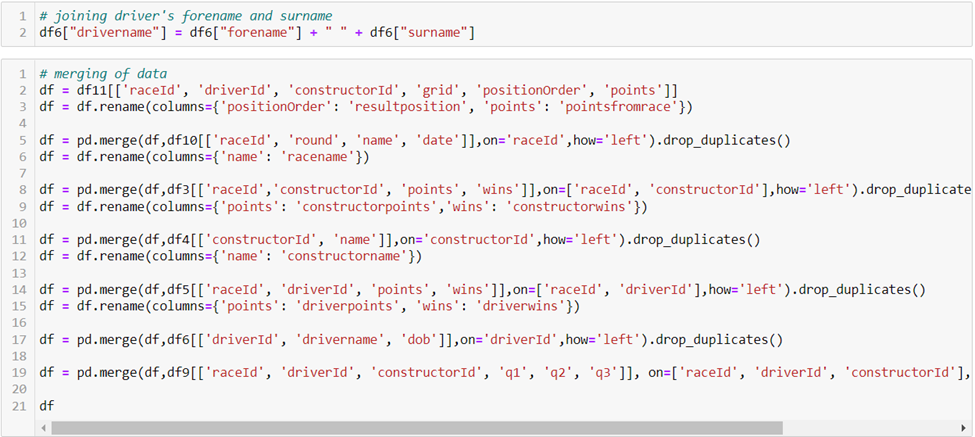

Upon deciding on the prediction problem, we now have to decide on which tables we would want to use. As from the prediction problem, we would want to use tables that have information on the driver’s and constructor’s race result. We then narrowed down and chose 7 tables to use, constructor_standing.csv, constructors.csv, driver_standings.csv, drivers.csv, qualifying.csv, races.csv and results.csv. For the constructors’ .csv, it provides us with the information of the constructor’s name and their points and wins for every race. For the drivers’ .csv, it provides us with the driver’s information and their performance for every race. As for the rest of the .csv, it gives us the information of the races and results.  To start off, we created a data frame that has the data from the results.csv. We chose to use certain columns from the table that provides us with the useful data that we need. We decided to start off with the results.csv as it contains the primary keys of the other tables that we are going to merge later on and it is also contains the most information so we do not want to lose any column due to merging later on. After creating the data frame, we edited the columns names as there are repeated column name in the different tables thus renaming it makes things clearer. Next, we merged the races.csv with the just created data frame on its primary key, ‘raceId’ and using left join. The reason we used left join instead of the default inner join as using inner join only gives us the results that appear on both tables that matches the raceId. This could cause some data from the results.csv table to be loss. To prevent that, we used left join to ensure that we could keep all the data from the results.csv. We then repeated the steps out merging and renaming the columns for the other tables, constructor_standings.csv, contructors.csv, driver_standings.csv, drivers.csv and qualifying.csv. However before merging the drivers.csv, we joined the driver’s forename and surname together to get the name of the driver. This allows us to have 1 less column, making the data frame more readable. 

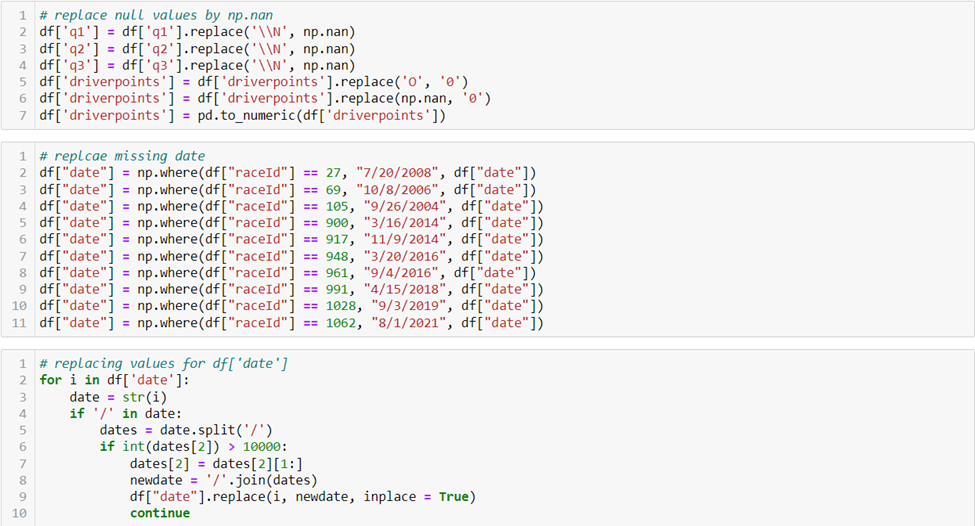

After merging all the needed tables together to get the data we want, we still have to wrangle to data, to get the driver’s and constructor’s points and wins before the race. But before we can start on that, we first have to replace the null values for the columns that we are going to use the create the data we want. Firstly, we replaced the null values for all the qualifying times. For the qualifying times columns, there are rows where the data is either ‘\N’ or (Blanks). To replace these rows, we replaced the rows that are ‘\N’ to np.nan. Secondly, we replaced the values for driverpoints for both ‘\N’ and ‘O’ to be 0.  We replaced these null values as 0 as when the drivers do not have any points, they always start from 0. We then recast it as numeric so that we are able to do calculation with the column later on. After replacing the null values, we will be replacing the missing date. For the date of the races, there are some rows that have no date. To replace the missing dates, we used the raceId to locate the rows that have no date and replaced the date. Lastly for the date column, there are some dates that have error. There will be an additional number at the front of the date making it an invalid year. To fix that issue, we wrote a code to runs through every date row and checks whether is there an invalid date or not. If there is an invalid date, the code would remove the first digit. We then re-cast date as datetime and created a new column called year that has the year value of date.

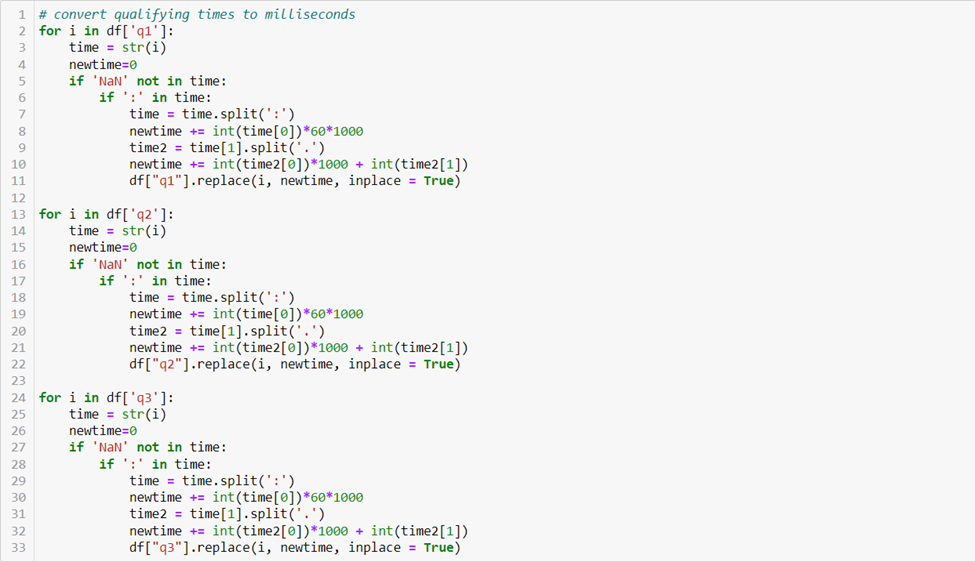

Next, we will be converting the qualifying times to milliseconds. As the qualifying times are in minutes, seconds and milliseconds, it is not numerical which makes it hard to use or transform. To do so, we wrote a code that splits to timing to different sections and multiplying them with values to get them to be in milliseconds. 

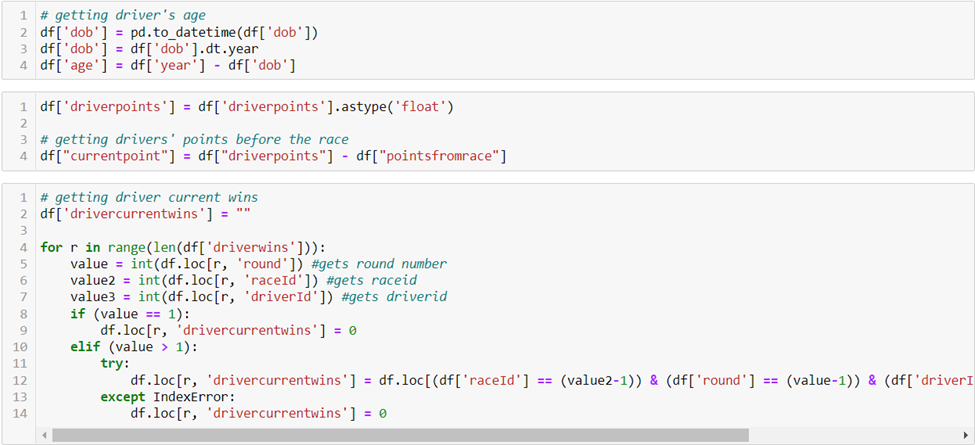

Afterwards, we will be deriving the data for the drivers. Firstly, we will start will age. Previously, we created a new column, year, which has the year of the race. To calculate the age of the driver when taking part in the race, we would use the year of race and subtract the year of the date on when the driver is born. To obtain the year of the date of birth of the drivers, we used .dt.year to obtain the year of the date of birth which we would use to subtract. Next, we would be calculating the driver’s points before the race. To do so, we first have to convert the driverpoints to float so that we are able to use it to calculate. Then, we would create a new column and use the driverpoints, which is the total points the driver has inclusive of the points from the race, and then subtract it with the points gained from the race. Lastly, for the driver’s current win count, we have to write a code that goes to the data frame, to search for the driver’s win count before the race. For the code, we first created a new column that will store the wins the driver has. Next, there is a for loop that goes through every row and gets the value for the round, raceId and driverId. If the round is 1, the driver’s win count will be 0 as there is no race beforehand. If not, it will try to find the win count for the previous race and round with the same driverId. If the win count is found, it would be added to the new column. If not, the win count would be set as 0 as the driver did not take part in the previous race. 

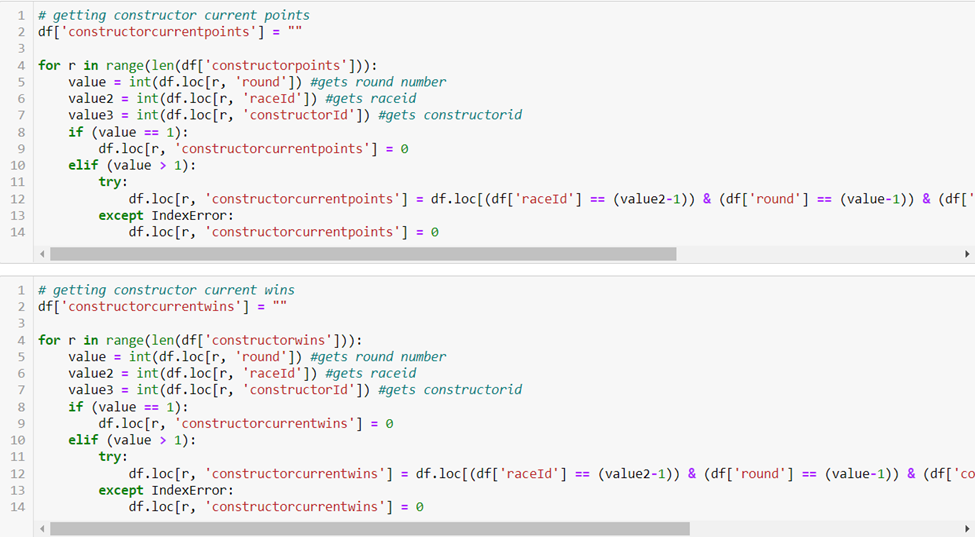

As for the constructor’s current points and wins, it uses the same code as driver’s current win. First, it gets the value for the round number, raceId and constructorId. Then if the round number is 1, both constructor’s points and wins would be 0. Else, it will search for the previous race and round with the same constructorId and get its points and wins. 

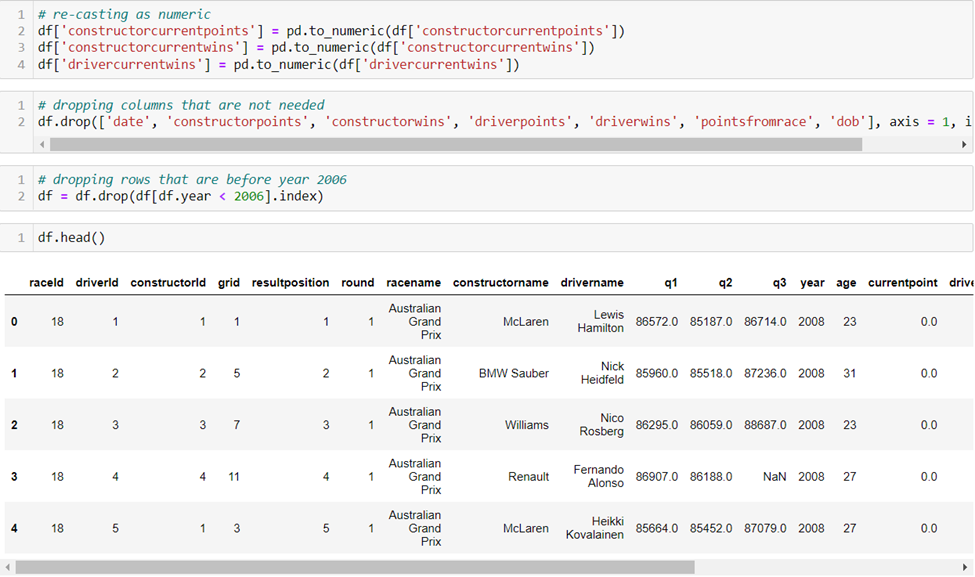

For the last few steps for data wrangling, we converted constructorcurrentpoints, constructorcurrentwins and drivercurrentwins to numeric and dropped the columns that we would not be using for the Machine Learning Model. We also dropped the rows that are before the year 2006. As before 2006, there is no such thing as qualifying periods thus the data for q1, q2 and q3 is all null values. This will cause more than half the value to be replaced with another value making the machine learning model harder to predict the target. Therefore I dropped these rows and only kept the rows after 2006 to the present. After all the data wrangling, we can finally proceed to the data cleansing and transformation. 

### 4. Data Cleansing and Transformation<a id="part12"></a>

Before doing anything to the data, it is very important to do data cleaning. Having clean data, it will increase the overall productivity and allow for the highest quality information. So, before we can use the data, we went through the data set and found out that the dataset is unclean and is unready to do anything to it. Therefore, we need to clean the data set.

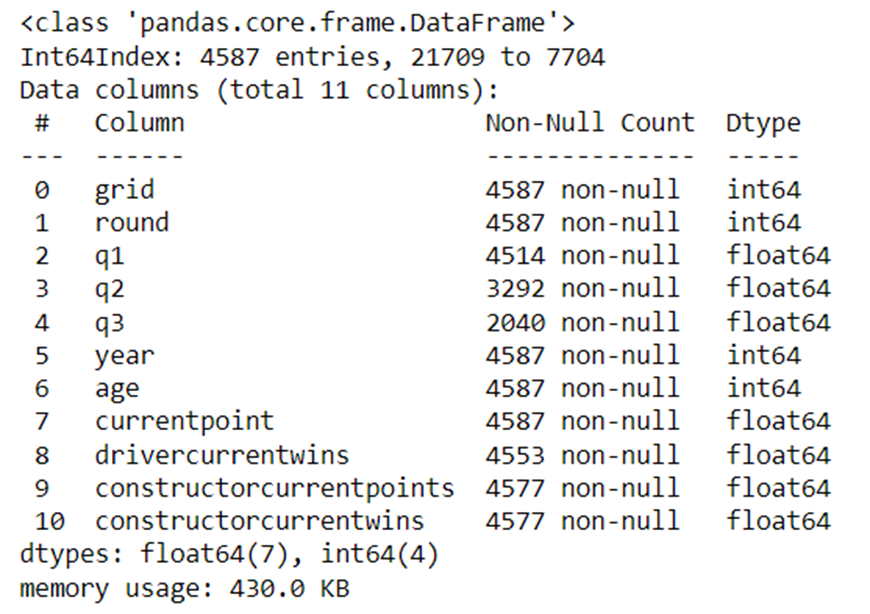

We firstly used .info() to see the non-null count. Using .info(), we would be able to see which variables have null in them and what data type they are. From the information, we can see that there are 6 variables with missing values. There are q1, q2, q3, drivercurrentwins, constructorcurrentpoints and constructorcurrentwins. As all these are numerical variables, there are many ways we could impute the missing data. we chose 2 ways to do it, arbitrary or median. The reason we thought arbitrary would be viable is because using arbitrary allows the data to maintain its distribution and it only creates outliers. As for median, we thought the values for q1, q2 and a3 were quite similar, using median would be good option to impute the missing variable. However, using median could cause the median value to be overrepresented, causing the data to be skewed. Therefore, we concluded that using arbitrary is the better method as it will not touch the distribution of the data. 

For q1, q2 and q3, we set the arbitrary value to be 99999 as the values for these columns are around 50000 to 80000. By setting the value to be 99999, it acts as an outlier thus it will not affect the distribution of the data. As for drivercurrentwins, constructorcurrentpoints and constructorcurrentwins, we set the value to 0. 

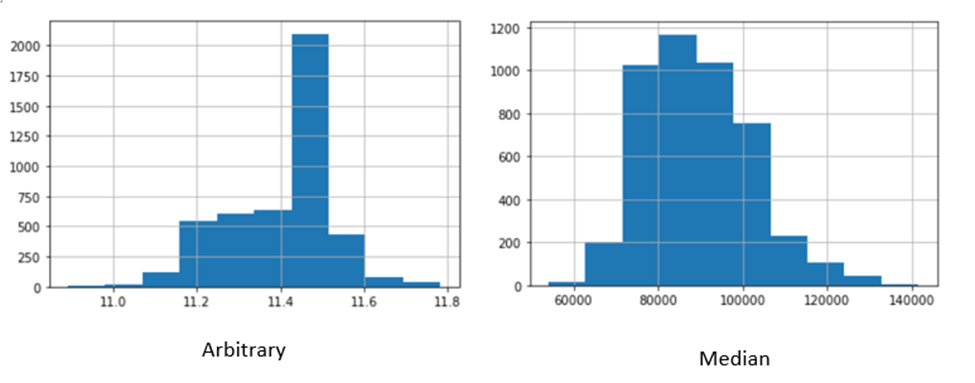

After the data cleansing, it is now time for data transformation. Data transformation is the process of changing format, structure or values of data. For most data models, they are able to better understand numerical variables, so we need to transform variables into numerical.

In our dataset, we have only numerical variables. Therefore, we need to transform these variables.

For numerical transformation, some data models assume the input variables are normally distributed. If the variables are not normally distributed, we can apply mathematical transformation to change the distribution. While transforming, sometimes we could find the linear relationship among variables and the target. There are multiple ways that we can transform numerical data such as Logarithm, Reciprocal and Yeo-Johnson. For this case, I will be using both Logarithm and Yeo-Johnson transformation. Firstly, we would be talking about the Yeo-Johnson transformation which we used it for curentpoints and constructorcurrentpoints. The Yeo-Johnson transformation is an extension of the Box-Cox transformation. The reason we chose Yeo-Johnson transformation method is because it can be used on variables with zero and negative values, as well as positive values which suit our scenario as we have values that are 0. As for the logarithm transformation, we used it for q1, q2 and q3. The logarithm function is the most common way to transform numerical variables. It has a strong effect on the shape of the variable distribution and can only be applied to positive variables. I used log (x+1) to prevent any values that are 0. 

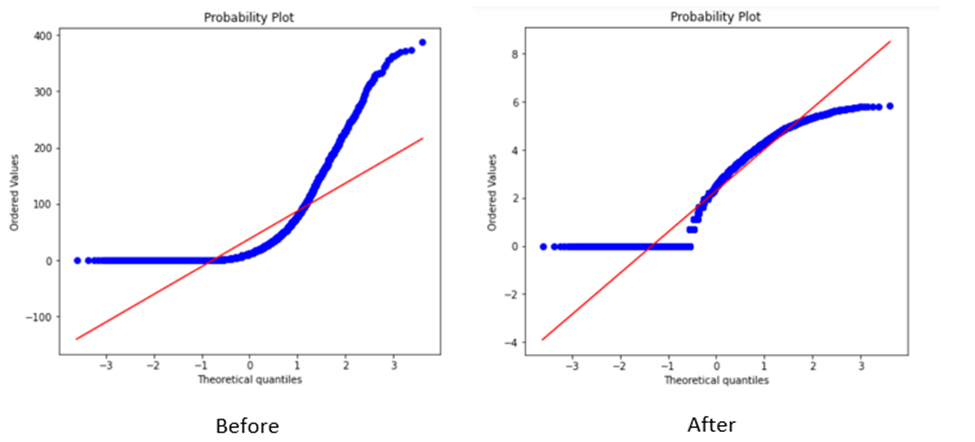

As for binning, it is to transform continuous variables into discrete variables by creating a set of contiguous intervals. By binning, we are able to change the distribution of skewed variables, minimize the influence of outliers and to improve the performance of some data models. For binning, there are multiple methods to do so such as equal width discretization and equal frequency discretization. For our binning, we chose to do equal width discretization. Equal width binning is the most popular way to do discretization. After binning, all bins represent an equal range of the original variable values. We chose equal width discretization instead equal frequency discretization as equal width makes every bin have roughly the same data, which does not make it normally distributed. Therefore, after binning, the distribution in my train and test set are similar thus there is a similar proportion of observations in the different intervals.

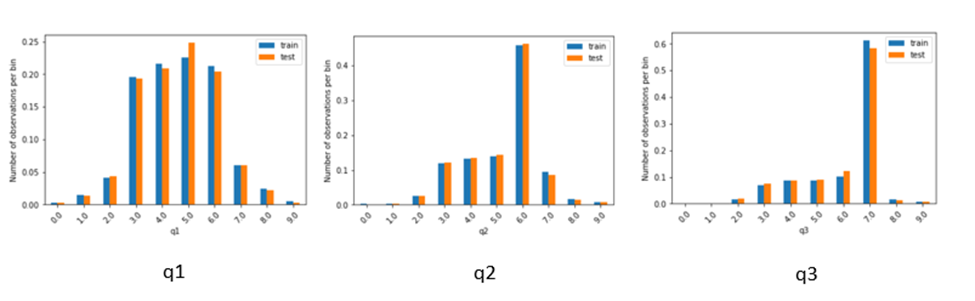

After transforming data, we are almost close to finishing our model. Now we need to do feature engineering to use domain knowledge to select and transform the most relevant raw data. To do so, we can use feature scaling, which has its own sub-divisions of Standardizing and Normalization or Mathematical Computation via Statistical or Mathematical pathways. The rationale for scaling is to give each feature fair numerical airtime. For feature scaling, it allows us to compare features importance and helps algorithms coverage faster, thus improving performance. We decided to do feature scaling as many machine learning algorithms are sensitive to the scale and magnitude of the features and features with bigger value ranges tend to dominate over features with smaller ranges. Among feature scaling, we did standardizing, which is the process of centering the variable at zero and standardizing the variance to 1. The result of the transformation is called z-score and represents how many standard deviations a given observation deviates from the mean. Afterwards, we set up the scaler and fit it into the train set to learn the parameters and then transform both train and test sets. The numerical features will then be scaled. 

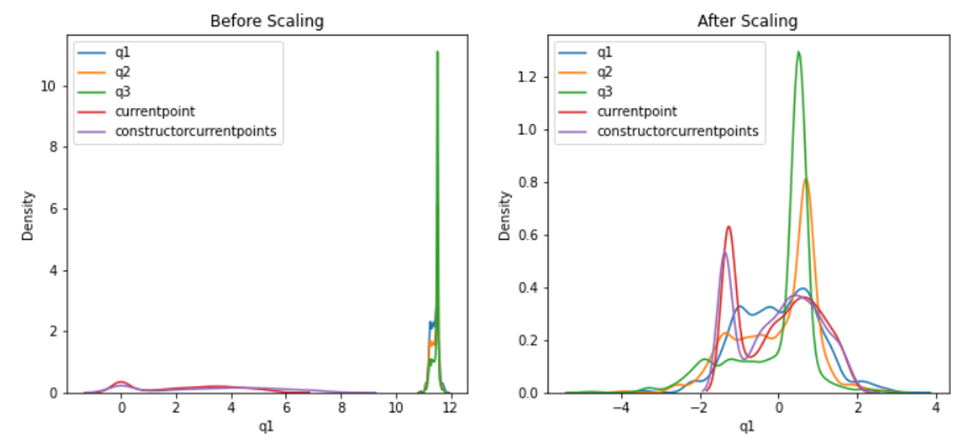

Although during the data transformation I did binning, I did not use binning as if I binned my numerical variables, I would not be able to do feature scaling to it thus I did not the use binned data. As for the other method, Principal Component Analysis, it is a dimensionality reduction technique used to reduce a high dimensional dataset into a smaller subset of Principal Components (PC), which explain most of the variability observed in the original data. The first PC of the data is a vector along which the observations vary the most, or in other words, a linear combination of the variables in the dataset that maximizes the variance. Mathematically, the first PC minimizes the sum of the squared distances between each observation and the PC. The second PC is again a linear combination of the original variables, which captures the largest remaining variance and is subject to the constraint that is perpendicular to the first PC. I fitted PCA to the scaled train set and plotted a graph. Based on the graph, the first 3 PC captures the most amount of variance, 67%. Based of this PCA, we could drop the others columns but as we want to use those column to predict the target, we will not be dropping them.

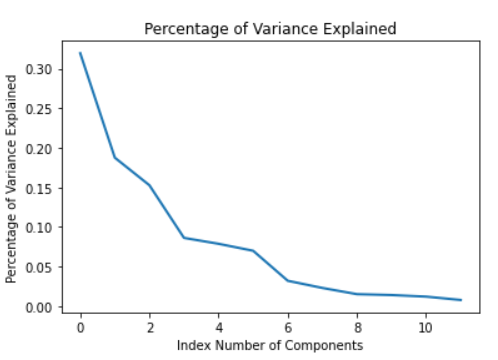

### 5. Machine Learning Model<a id="part13"></a>

After all the above steps have been done, cleansing of data, data transformation, feature engineer, we are now at out final step, machine learning model. There are 2 kinds of algorithm used for prediction in machine learning, regression and classification. For classification, it is a process of finding a function which helps in dividing the dataset into classes based on different parameters. There are different classification algorithms such as logistic regression, k-nearest neighbors and support vector machines. For regression, it is a process of finding the correlations between dependent and independent variables. It helps in predicting the continuous variables such as trends. 

For my prediction problem, it is classification problem as the data is categorical. My target is resultposition which are integer and is not continuous, thus it is a classification model. 

For this assignment, we built both a naïve baseline and a simple machine learning. Both models show the accuracy of the machine learning model. By having a higher accuracy, it shows that the machine learning model is better. Therefore, I will be using it to determine which methods of data transformation is better. A naïve baseline model is a simple classification model that assumes little to nothing about the problem and the performance of which provides a baseline by which all models evaluated on a dataset can be compared. For my naïve baseline model, my train data accuracy is 5.34% and my test data accuracy is 3.15%.

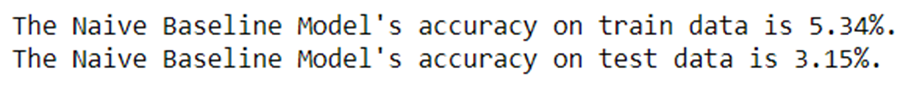

Afterwards, we built a logistic regression model. Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. For my logistic regression model, I tried using the different transformation variables. 

For the missing value imputation, we used both arbitrary and median. For both arbitrary and median imputation, we had the same accuracy of the train data at 13.17%. However, for the test data accuracy, the median imputation has a slightly higher accuracy by 0.15%. With this slightly higher accuracy, we found out that using median imputation might be better than arbitrary.

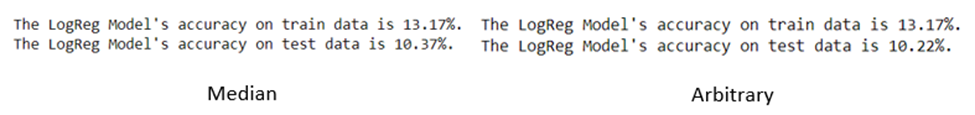

Now, let us compare the accuracy for feature scaling and binning, to see which method has the best model performance for the logistic regression model. For feature scaling, I did it for both median and arbitrary imputation. From the machine learning model, the accuracy for scaling with arbitrary imputation has a higher accuracy compared to median imputation. For the scaled data for arbitrary imputation, it has a train and test accuracy at 14.52% and 10.42% respectively, which is 4% higher for train and 0.5% for test compared to median imputation. As for the binning accuracy, it has the lowest accuracy of all at 8.70% and 6.96% for train and test. Therefore, using arbitrary imputation, with feature scaling produces the best performance model as it has the best accuracy for train and test.

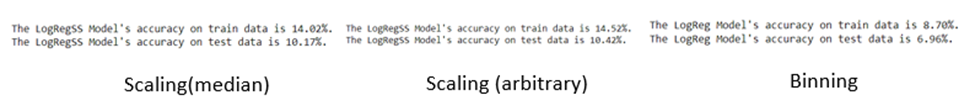

### 6. Summary and Further Improvements<a id="part14"></a>

We have finally completed preparing the data for modelling and built a naïve baseline model and logistic regression model to test it out. Throughout, we have tested many different methods to prepare the data and we have finally concluded with the best way to do so. Let us recap from the start. We first understood the problem we have at hand and went through the data and explored it. This gives us a better understanding of the data, so that we could prepare the data more easily. Next, we cleanse the data such as replacing values. Afterwards we transformed the numerical data. Lastly, we did feature engineering followed by the machine learning model. From the logistic regression model, we have found out that although using median for numerical missing value imputation was the better option,  using feature scaling with arbitrary missing value imputation was overall better. Compared to binning, feature scaling with arbitrary imputation was also better. To further improve, I think I could have experimented more such as trying out more data transformation method. I could also maybe try other different classification machine model such as support vector machines to see the different results.